In [34]:
#importing the necessary modules
from scipy.io import wavfile
from scipy.fft import fft, ifft
from scipy.fft import rfft, rfftfreq
from matplotlib import pyplot as plt
#reading the .wav file, nrate is the sampling rate, data contains all the samples
#nrate for the given wav file is 16,0000 samples per second
#the duration of the audio is 4 seconds and it has a total of 64,000 samples
nrate, ndata = wavfile.read(r'C:\\Users\Dell\Downloads\a2\test_noise.wav')

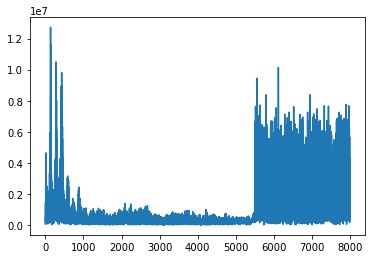

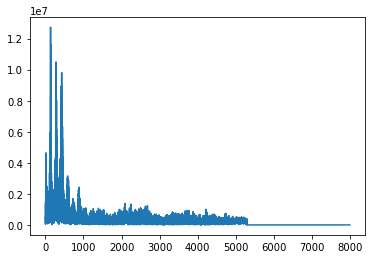

In [35]:
#computing the DFT of the original sample(real)[y-axis]
yft = rfft(ndata)
#computing all the frequencies for the DFT[x-axis](samples, sampling rate as parameters)
xft = rfftfreq(4*nrate, 1 / nrate)
#plotting the transform
plt.plot(xft, np.abs(yft))
plt.show()

#attenuating all the frequencies above 5300
p = len(xft) / (nrate / 2)
yft[int(p*5300):]=0
#plotting the modified waveform
plt.plot(xft, np.abs(yft))
plt.show()

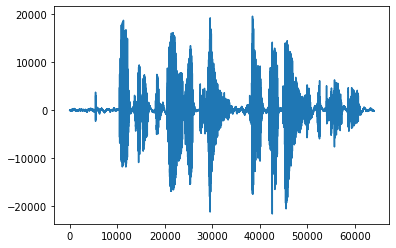

In [36]:
from scipy.fft import irfft
#constructing tehe new signal from Inverse Fourier Transform
new_sig = irfft(yft)
#plotting the new signal
plt.plot(new_sig[:64000])
plt.show()


In [37]:
#normalising the modified signal and converting into 16 bit int form
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))
#writing to a new wav file
wavfile.write('test1b.wav',nrate,norm_new_sig)

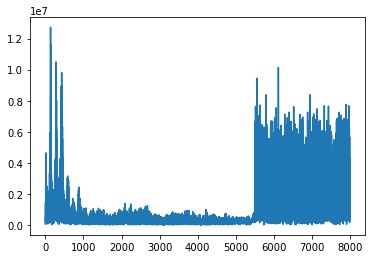

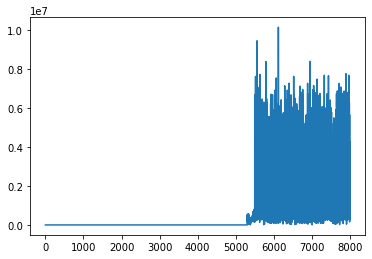

In [38]:
from scipy.fft import rfft, rfftfreq
from matplotlib import pyplot as plt
normdata = np.int16((ndata / ndata.max()) * 32767)
yft = rfft(normdata)
xft = rfftfreq(4*nrate, 1 / nrate)
plt.plot(xft, np.abs(yft))
plt.show()

p = len(xft) / (nrate / 2)
yft[:int(p*5300)]=0
plt.plot(xft, np.abs(yft))
plt.show()

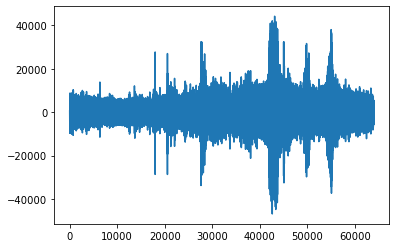

In [39]:
from scipy.fft import irfft
new_sig = irfft(yft)
plt.plot(new_sig[:64000])
plt.show()


In [40]:
norm_new_sig = np.int16(new_sig)
wavfile.write('noise.wav',nrate,norm_new_sig)